## Importing Libraries

In [565]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.spatial.distance import cosine

## Face Detection 

In [525]:
def face_detection():
    img_path = []
    resized_img = []
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    path = "/Users/khushal/Desktop/Spring 2023/CVIP/images"
    image_width = 224
    image_height = 224
    size = (image_width,image_height)

    for images in os.listdir(path):
        #print(images)
        if images.endswith(".jpg") or images.endswith(".jpeg"):
            img_path.append(os.path.join(path,images))
    #return img_path

    #readig images from image path 
    for i in img_path:
        img = cv2.imread(i)
        image_array = np.array(img, "uint8")
        gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x_, y_, w, h) in faces:
            #creating bounding box over the face detected 
            face_detect = cv2.rectangle(img, (x_, y_), (x_ + w, y_ + h), (255, 0, 255), 2)
            roi_gray = gray[y_:y_ + h, x_:x_ + w]
            roi_color = img[y_:y_ + h, x_:x_ + w]
            # resize all images to 224x244
            resized_image = cv2.resize(roi_gray, size)
            resized_img.append(resized_image)
            # save cropped image
            filename = os.path.splitext(os.path.basename(i))[0]
            save_path = os.path.join("/Users/khushal/Desktop/Spring 2023/CVIP/cropped_images", filename + '_cropped.jpg')
            cv2.imwrite(save_path, resized_image)

    return resized_img, img_path

img_color, path = face_detection()
    
            

x,y = face_detection()
print(x)


[array([[45, 46, 49, ..., 13, 13, 13],
       [44, 46, 48, ..., 13, 13, 13],
       [43, 45, 47, ..., 13, 12, 12],
       ...,
       [24, 24, 25, ..., 92, 94, 96],
       [24, 24, 25, ..., 91, 93, 94],
       [24, 25, 26, ..., 90, 92, 93]], dtype=uint8), array([[21, 27, 29, ..., 71, 67, 66],
       [18, 26, 29, ..., 75, 68, 61],
       [19, 25, 26, ..., 75, 68, 60],
       ...,
       [66, 60, 51, ..., 78, 75, 78],
       [65, 59, 52, ..., 78, 76, 81],
       [60, 55, 49, ..., 79, 81, 82]], dtype=uint8), array([[61, 65, 66, ..., 59, 60, 58],
       [62, 65, 65, ..., 58, 59, 57],
       [64, 66, 65, ..., 57, 57, 56],
       ...,
       [28, 24, 25, ..., 90, 90, 89],
       [30, 27, 26, ..., 76, 78, 79],
       [33, 31, 29, ..., 67, 69, 70]], dtype=uint8), array([[ 15,  15,  15, ...,  54,  52,  66],
       [ 14,  19,  17, ...,  51,  46,  61],
       [ 15,  17,  14, ...,  50,  41,  53],
       ...,
       [135, 135, 132, ..., 191, 192, 197],
       [138, 136, 136, ..., 190, 194, 201],
  

In [526]:
print(len(x))

59


In [692]:
# Flattening Images 
flatten_img = []
for i in x:
    flatten_img.append(i.flatten())


#print(type(flatten_img))
img_arry = np.array(flatten_img)

#removing outliers 
mean_abs_deviation = np.median(np.abs(img_arry - np.median(img_arry)), axis=0)
outliers = np.abs(img_arry - np.median(img_arry))/mean_abs_deviation < 4
img_array = img_arry[~outliers]
print(len(img_arry))
print(img_arry.shape)


59
(59, 50176)


In [693]:
# Normalize the feature vectors
scaler = StandardScaler()
normalized_face_encodings = scaler.fit_transform(img_arry)

## K - Means Clustering Algorithm from scratch 
### using Euclidean distnace and manhattan distance 
### decided to go with manhattan distance 

In [698]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def kmeans(data, k, max_iterations=700, tolerance=0.000001):
    # Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    prev_centroids = None
    labels = np.zeros(data.shape[0])

    for _ in range(max_iterations):
        # Calculate distances between data points and centroids using L1 Norm( Euclidean distnce)
        #distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

        #Calculate distances between data points and centroids using Manhattan distance 
        distances = np.sum(np.abs(data[:, np.newaxis] - centroids), axis=2)

        
        # Assign labels based on minimum distance
        new_labels = np.argmin(distances, axis=1)

        # Update centroids
        for i in range(k):
            if np.any(new_labels == i):
                centroids[i] = np.mean(data[new_labels == i], axis=0)

        # Check for convergence
        if prev_centroids is not None and np.linalg.norm(centroids - prev_centroids) < tolerance:
            break

        prev_centroids = centroids.copy()
        labels = new_labels

    return centroids, labels


## Using Cosine similarity 

In [604]:
#_________________-----------------_COSINE SIMILARITY_______--------------______________
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def kmeans(data, k, max_iterations=500, tolerance=0.001):
    # Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    prev_centroids = None
    labels = np.zeros(data.shape[0])

    for _ in range(max_iterations):
        # Calculate distances between data points and centroids using cosine similarity
        distances = np.zeros((data.shape[0], k))
        for i in range(k):
            distances = 1 - cosine_similarity(data.reshape(data.shape[0], -1), centroids[i].reshape(1, -1))

        # Assign labels based on minimum distance
        new_labels = np.argmin(distances, axis=1)

        # Update centroids
        for i in range(k):
            if np.any(new_labels == i):
                centroids[i] = np.mean(data[new_labels == i], axis=0)

        # Check for convergence
        if prev_centroids is not None and np.linalg.norm(centroids - prev_centroids) < tolerance:
            break

        prev_centroids = centroids.copy()
        labels = new_labels

    return centroids, labels


In [699]:
def visualize_clusters(images, labels, k):
    for i in range(k):
        cluster_images = [img for img, label in zip(images, labels) if label == i]
        n = len(cluster_images)
        if n > 0:
            ncols = 5
            nrows = int(np.ceil(n / ncols))

            fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
            axes = axes.ravel()

            for j, img in enumerate(cluster_images):
                axes[j].imshow(img, cmap='gray')
                axes[j].axis('off')

            for j in range(n, nrows * ncols):
                axes[j].axis('off')

            plt.suptitle(f"Cluster {i + 1}")
            plt.show()


## Cluster Visualization

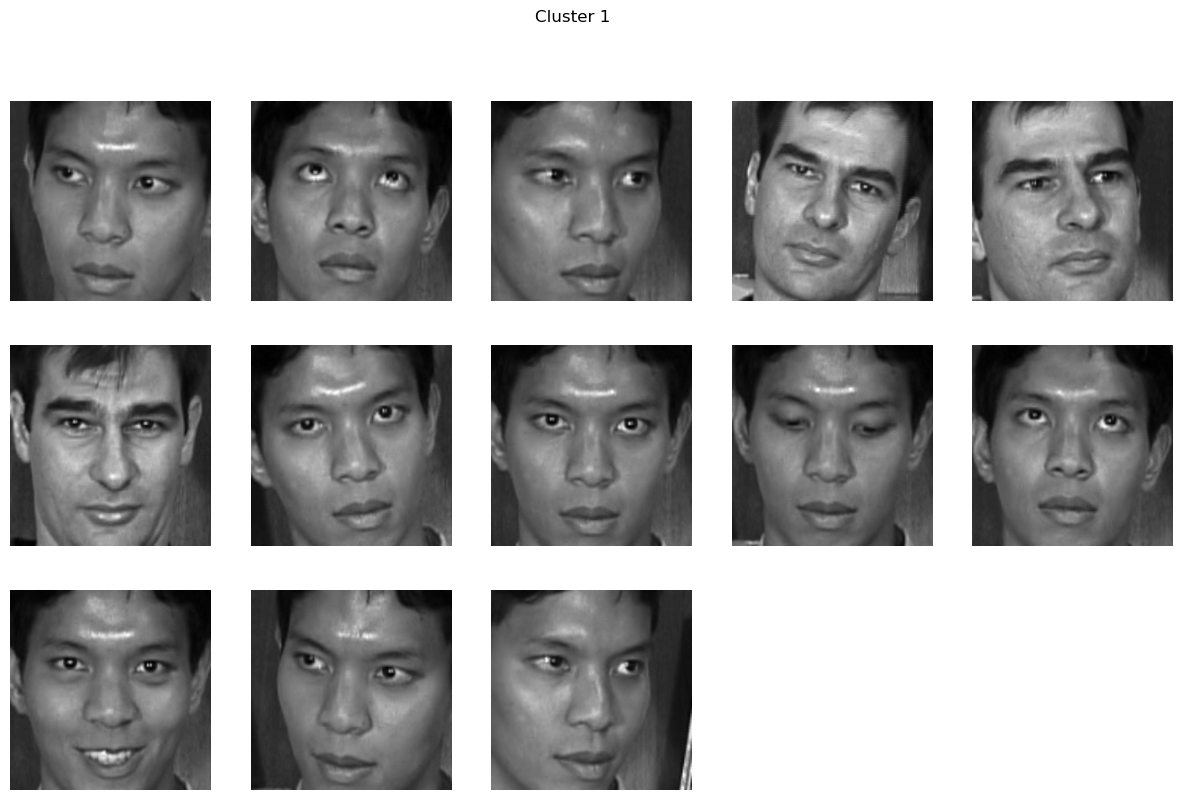

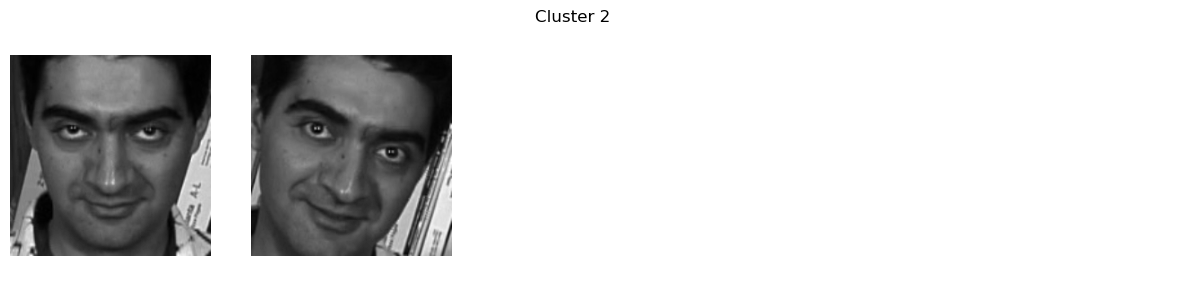

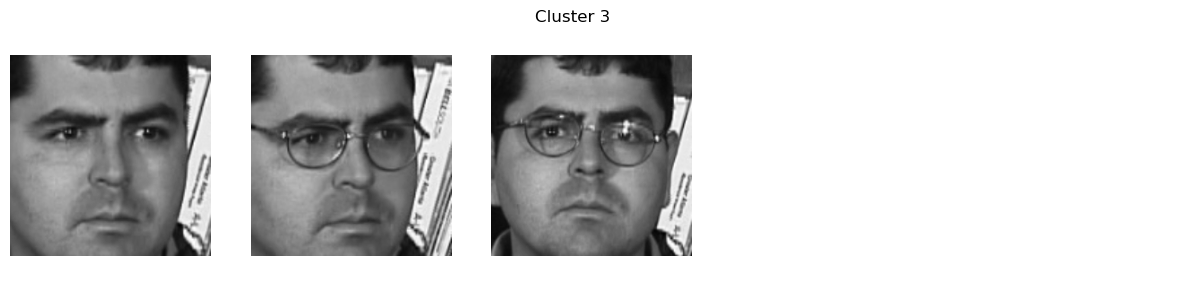

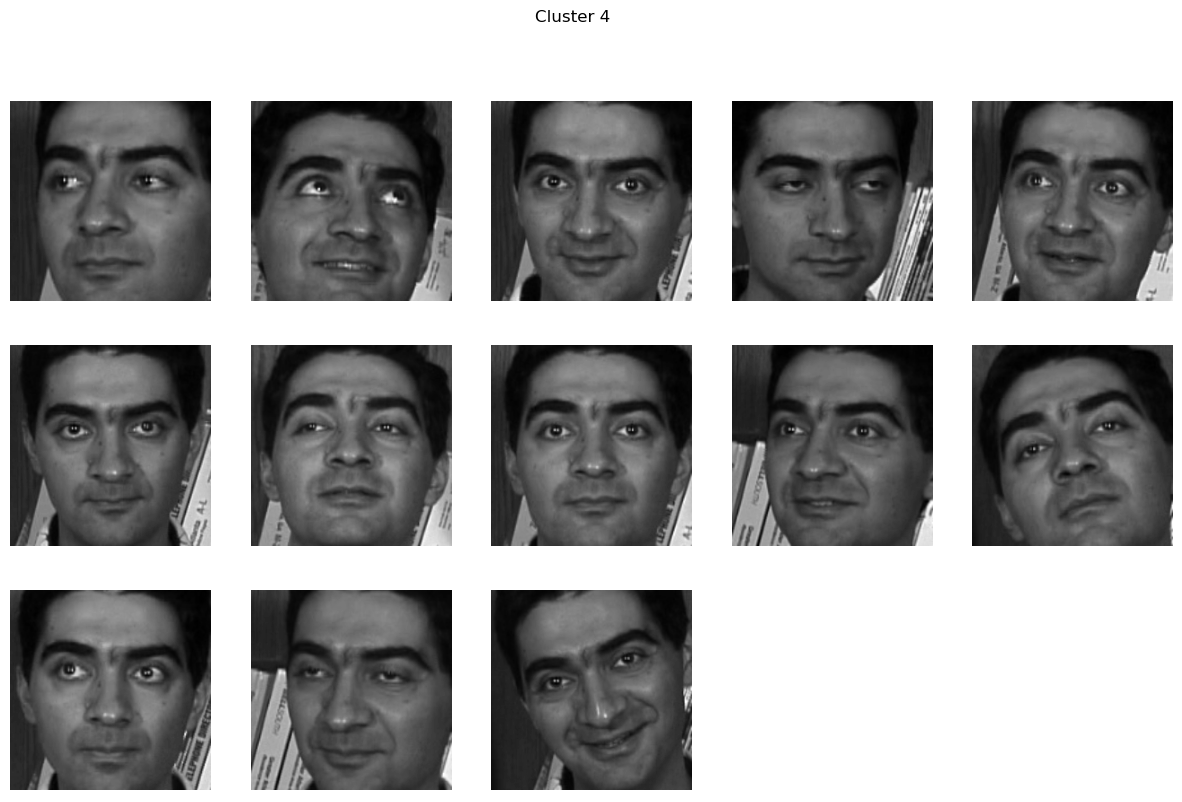

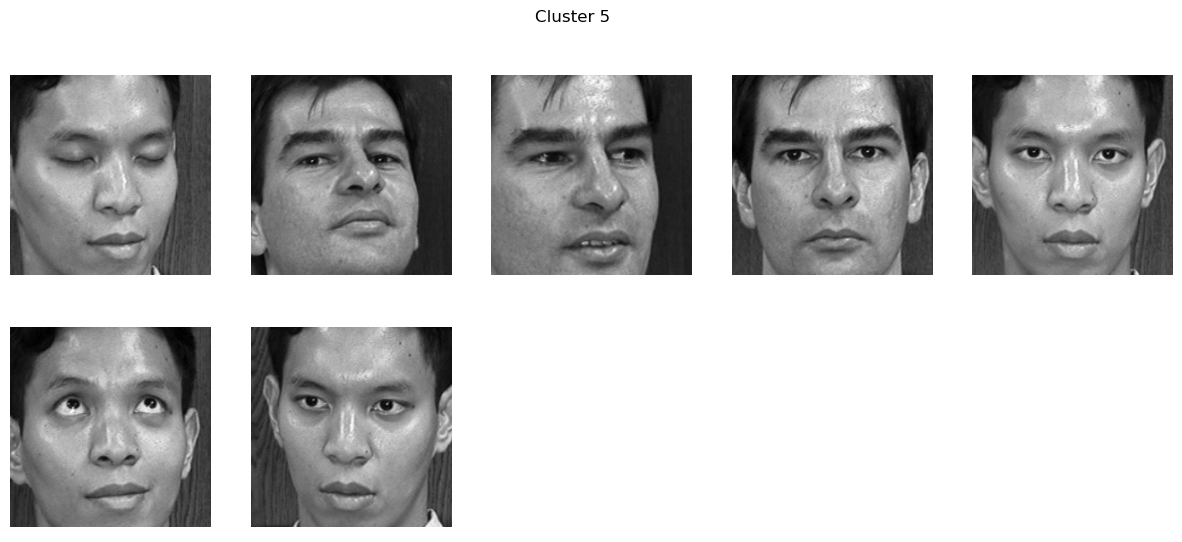

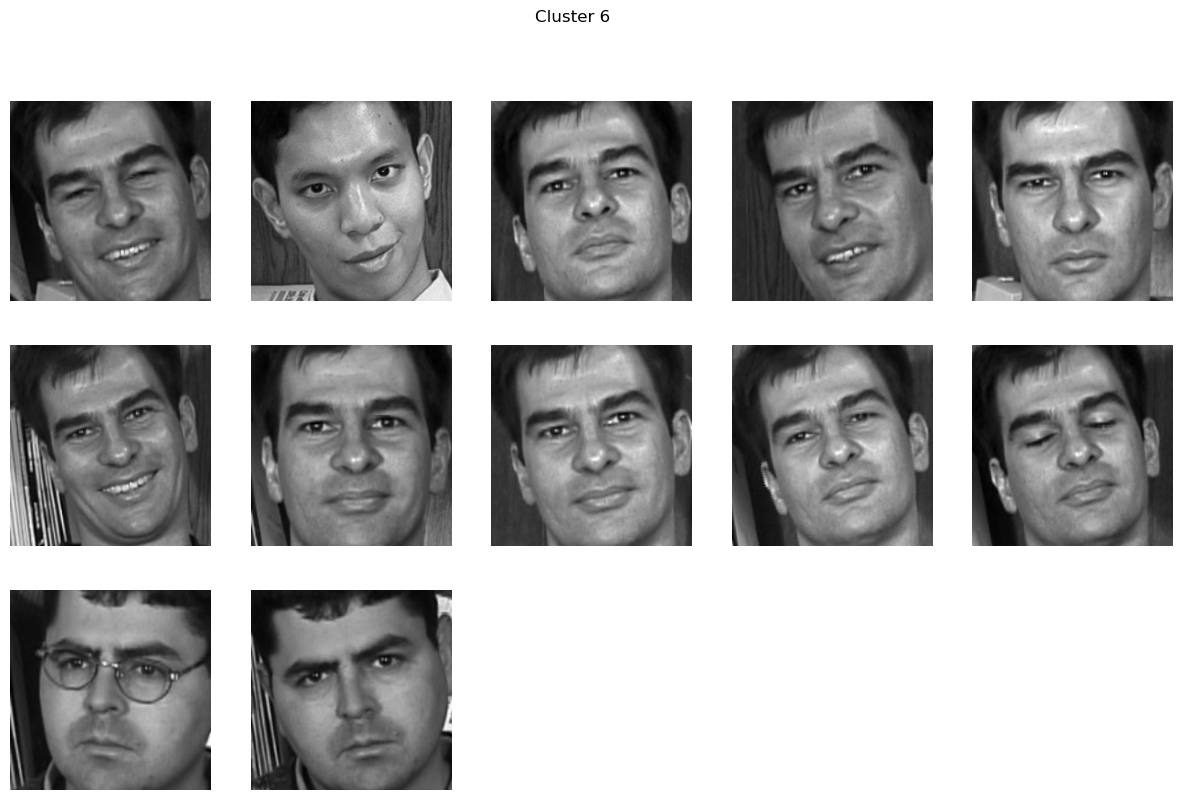

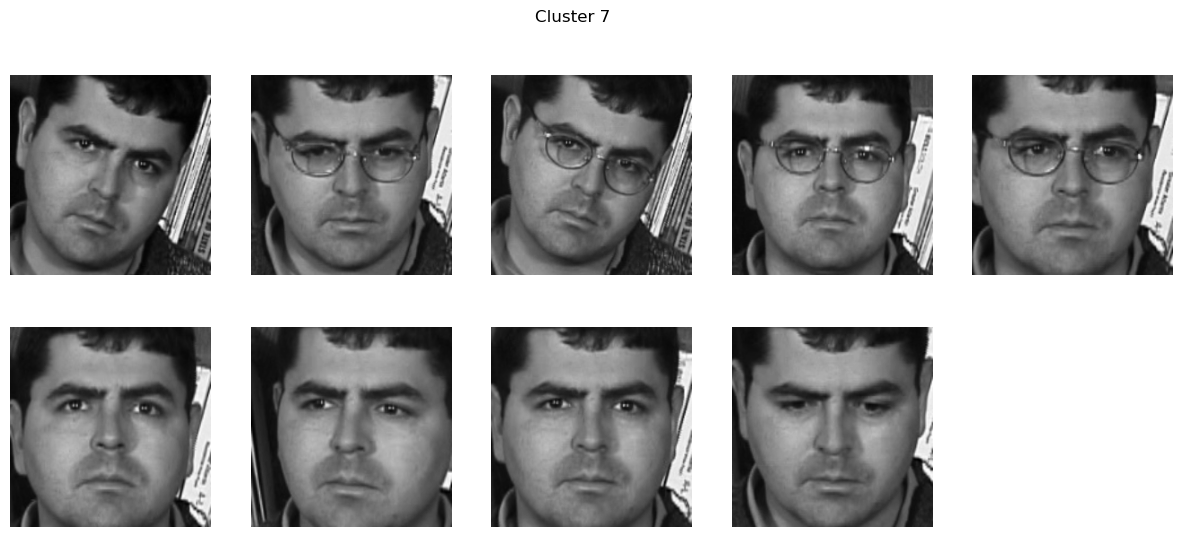

In [700]:
k = 7

centroids, labels = kmeans(normalized_face_encodings, k)

visualize_clusters(x, labels, k)


In [564]:
print(centroids)
print(labels)

[[42 42 41 ... 77 75 74]
 [42 42 42 ... 79 77 75]
 [42 42 41 ... 81 79 77]
 [41 41 41 ... 74 71 69]
 [43 43 42 ... 82 79 78]
 [41 41 41 ... 74 71 69]]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


## K - Means Clustering using library

In [528]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from PIL import Image

In [542]:
# Choose the number of clusters (K)
num_clusters = 6
output_directory = "/Users/khushal/Desktop/Spring 2023/CVIP/clusters"
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=64)
kmeans.fit(normalized_face_encodings)
# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Iterate through the face images and their cluster assignments
for face_image_path, cluster_label in zip(y, kmeans.labels_):
    # Create a directory for the cluster if it doesn't exist
    cluster_directory = os.path.join(output_directory, f"cluster_{cluster_label}")
    if not os.path.exists(cluster_directory):
        os.makedirs(cluster_directory)

    # Save the face image to the cluster directory
    img = Image.open(face_image_path)
    img.save(os.path.join(cluster_directory, os.path.basename(face_image_path)))


## Silhouette analysis For Optimal k

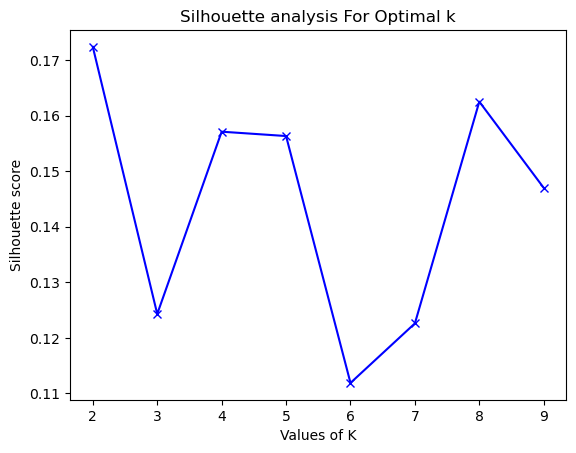

In [541]:
range_n_clusters = [2,3,4,5,6,7,8,9]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(normalized_face_encodings)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(normalized_face_encodings, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [543]:
def visualize_clusters(images, labels, k):
    for i in range(k):
        cluster_images = [img for img, label in zip(images, labels) if label == i]
        n = len(cluster_images)
        if n > 0:
            ncols = 5
            nrows = int(np.ceil(n / ncols))

            fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))
            axes = axes.ravel()

            for j, img in enumerate(cluster_images):
                axes[j].imshow(img, cmap='gray')
                axes[j].axis('off')

            for j in range(n, nrows * ncols):
                axes[j].axis('off')

            plt.suptitle(f"Cluster {i + 1}")
            plt.show()


## Cluster Visualization 

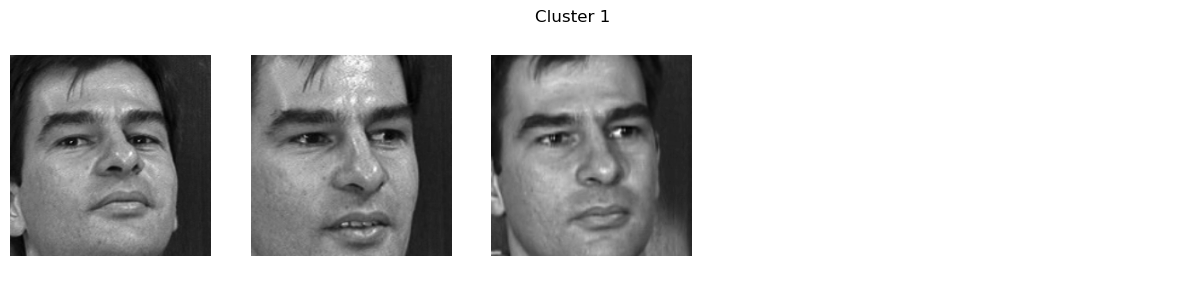

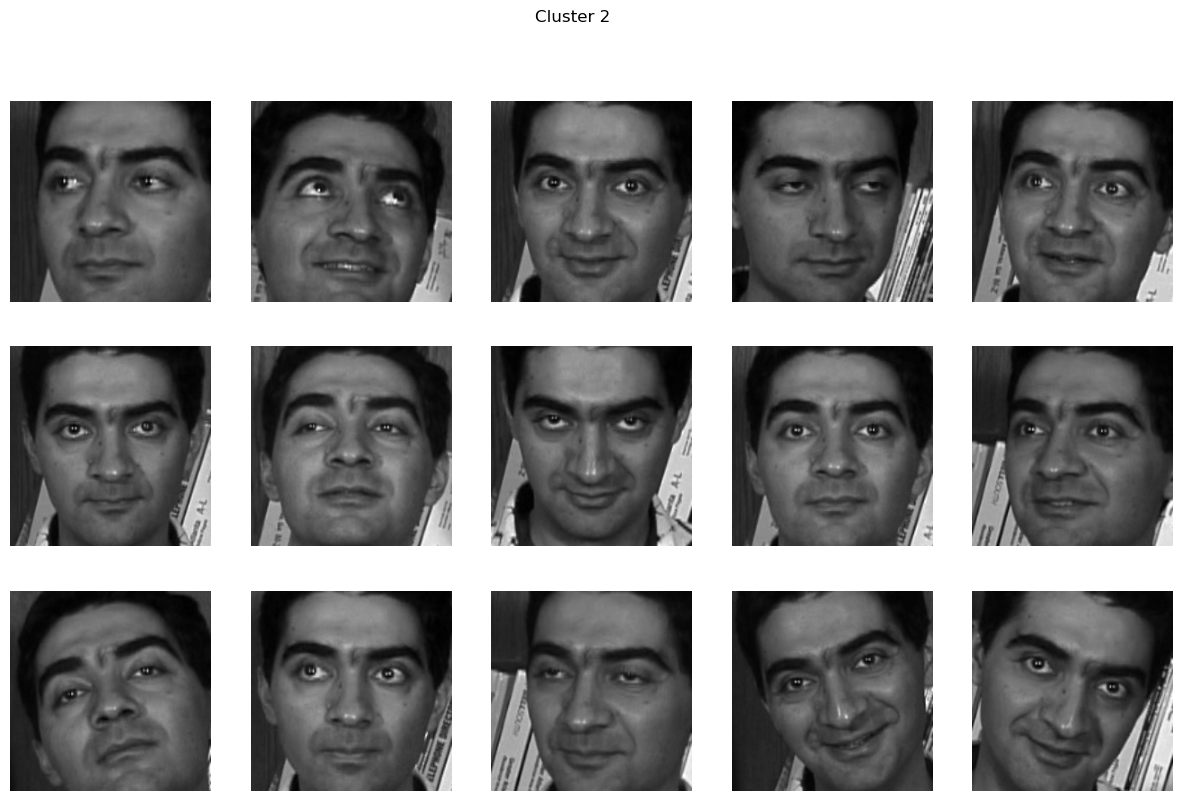

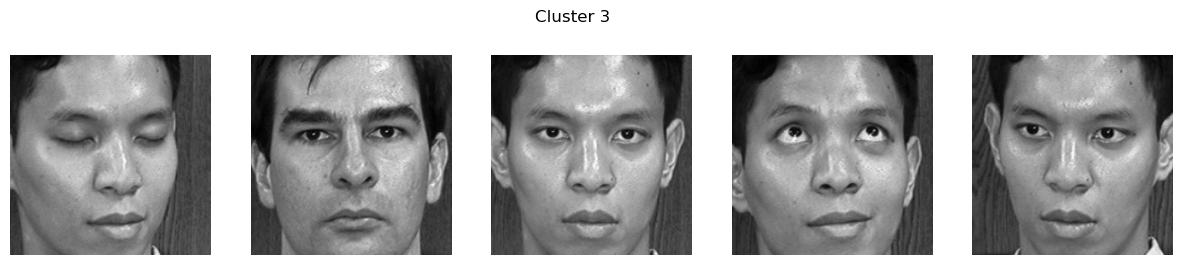

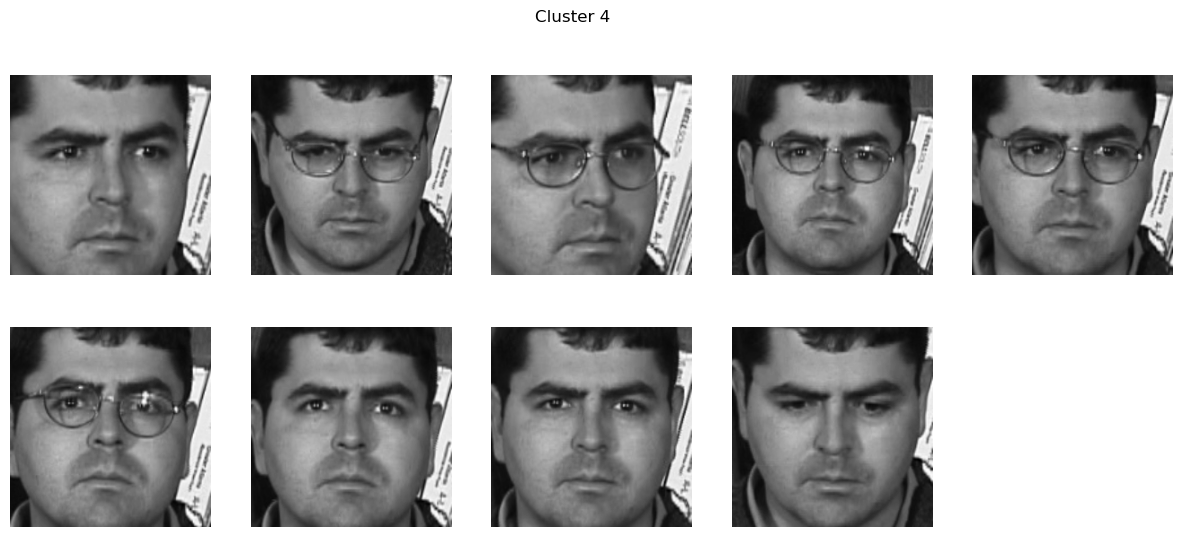

In [544]:
visualize_clusters(x, kmeans.labels_, k)